In [2]:
import numpy as np
import pandas as pd

# **Importing Data**

In [3]:
hatla2ee_data=pd.read_csv("hatla2ee_scraped_data1.csv")
olx_data=pd.read_csv("olx_scraped_data1.csv")


# **Data Exploration**

In [4]:
hatla2ee_data.head(2)

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Mercedes C 180 2019 \n\n\nVerified User,"2,775,000 EGP",Gray,"50,000 Km",Mercedes,C 180,Cairo,2025-02-12,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/mercedes/c-180/...
1,BMW 520 2015,"1,300,000 EGP",Silver,"235,000 Km",BMW,520,6 October,2025-02-12,No,No,No,No,https://eg.hatla2ee.com/en/car/bmw/520/6905272


In [5]:
hatla2ee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23163 entries, 0 to 23162
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    23163 non-null  object
 1   Price                   23105 non-null  object
 2   Color                   23163 non-null  object
 3   Mileage                 22069 non-null  object
 4   Make                    23163 non-null  object
 5   Model                   23163 non-null  object
 6   City                    23163 non-null  object
 7   Date Displayed          23163 non-null  object
 8   Automatic Transmission  23163 non-null  object
 9   Air Conditioner         23163 non-null  object
 10  Power Steering          23163 non-null  object
 11  Remote Control          23163 non-null  object
 12  Item URL                23163 non-null  object
dtypes: object(13)
memory usage: 2.3+ MB


In [6]:
olx_data.head(2)

,Make,Model,Year,Price,Transmission,Kilometers,Fuel
0,Mercedes-Benz,G63,2023,16500000,Automatic,0,Benzine
1,Mercedes-Benz,C200,2023,3900000,Automatic,5000,Benzine


In [7]:
olx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          8756 non-null   object
 1   Model         8756 non-null   object
 2   Year          8756 non-null   int64 
 3   Price         8756 non-null   int64 
 4   Transmission  8756 non-null   object
 5   Kilometers    8756 non-null   int64 
 6   Fuel          8756 non-null   object
dtypes: int64(3), object(4)
memory usage: 479.0+ KB


# Data Preprocessing - Duplicates Cleanup

Source of Duplicates : Ads cars in sites

In [8]:
duplicate=hatla2ee_data.duplicated().sum()
print(f"duplicated rows count:{duplicate}")
hatla2ee_data = hatla2ee_data.drop_duplicates()
duplicate=hatla2ee_data.duplicated().sum()
print(f"duplicated rows count:{duplicate}")
hatla2ee_data.shape

duplicated rows count:231
duplicated rows count:0


(22932, 13)

In [9]:
duplicate=olx_data.duplicated().sum()
print(f"duplicated rows count:{duplicate}")
olx_data = olx_data.drop_duplicates()
duplicate=olx_data.duplicated().sum()
print(f"duplicated rows count:{duplicate}")
olx_data.shape

duplicated rows count:1307
duplicated rows count:0


(7449, 7)

# Data Preprocessing - Dropping cars with missing values

In [10]:
missing=hatla2ee_data.isnull().sum()
print(missing)

Name                         0
Price                       42
Color                        0
Mileage                   1069
Make                         0
Model                        0
City                         0
Date Displayed               0
Automatic Transmission       0
Air Conditioner              0
Power Steering               0
Remote Control               0
Item URL                     0
dtype: int64


In [11]:
#drop rows with null values in specific columns : Name , Price , Mileage , Make , Model as other columns are not important
hatla2ee_data = hatla2ee_data.dropna(subset=['Name','Price','Mileage','Make','Model'])
missing=hatla2ee_data.isnull().sum()
print(missing)

Name                      0
Price                     0
Color                     0
Mileage                   0
Make                      0
Model                     0
City                      0
Date Displayed            0
Automatic Transmission    0
Air Conditioner           0
Power Steering            0
Remote Control            0
Item URL                  0
dtype: int64


In [12]:
missing=olx_data.isnull().sum()
print(missing)
#no missing values in olx_data

Make            0
Model           0
Year            0
Price           0
Transmission    0
Kilometers      0
Fuel            0
dtype: int64


# Data Preprocessing - Fix Columns Values

#Fix Price , Mileage values of hatla2ee data

In [13]:
missing=hatla2ee_data.isnull().sum()
print(missing)
#no null values

Name                      0
Price                     0
Color                     0
Mileage                   0
Make                      0
Model                     0
City                      0
Date Displayed            0
Automatic Transmission    0
Air Conditioner           0
Power Steering            0
Remote Control            0
Item URL                  0
dtype: int64


In [14]:
hatla2ee_data.head(2)
#Old values :
#price : 2,775,000 EGP , Mileage : 50,000 Km

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Mercedes C 180 2019 \n\n\nVerified User,"2,775,000 EGP",Gray,"50,000 Km",Mercedes,C 180,Cairo,2025-02-12,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/mercedes/c-180/...
1,BMW 520 2015,"1,300,000 EGP",Silver,"235,000 Km",BMW,520,6 October,2025-02-12,No,No,No,No,https://eg.hatla2ee.com/en/car/bmw/520/6905272


In [15]:
hatla2ee_data["Mileage_new"] = (
    hatla2ee_data["Mileage"] .astype(str) .str.replace("Km", "", regex=True) .str.replace(",", "", regex=True).str.strip())

hatla2ee_data["Mileage_new"] = pd.to_numeric(hatla2ee_data["Mileage_new"], errors="coerce")



hatla2ee_data["Price"] = (
    hatla2ee_data["Price"] .astype(str) .str.replace("EGP", "", regex=True) .str.replace(",", "", regex=True).str.strip())

hatla2ee_data["Price"] = pd.to_numeric(hatla2ee_data["Price"], errors="coerce")


In [16]:
hatla2ee_data[['Mileage','Mileage_new','Price']].head(2)
#New values :
#price : 2775000 , Mileage : 50000

,Mileage,Mileage_new,Price
0,"50,000 Km",50000.0,2775000
1,"235,000 Km",235000.0,1300000


In [17]:
missing=hatla2ee_data.isnull().sum()
print(missing)
#there are some null values in Mileage_new
#print rows with null values of Mileage_new
hatla2ee_data[hatla2ee_data["Mileage_new"].isnull()]
print(hatla2ee_data[hatla2ee_data["Mileage_new"].isnull()][['Mileage','Mileage_new']])
#rows with wrong Mileage values , drop them

Name                       0
Price                      0
Color                      0
Mileage                    0
Make                       0
Model                      0
City                       0
Date Displayed             0
Automatic Transmission     0
Air Conditioner            0
Power Steering             0
Remote Control             0
Item URL                   0
Mileage_new               89
dtype: int64
         Mileage  Mileage_new
148        Black          NaN
520       Silver          NaN
604    Dark grey          NaN
937       Silver          NaN
969     Eggplant          NaN
...          ...          ...
21906     Silver          NaN
22153        Red          NaN
22173      White          NaN
22604      Black          NaN
22968     Silver          NaN

[89 rows x 2 columns]


In [18]:
#drop rows with null values in specific columns : new Mileage
hatla2ee_data = hatla2ee_data.dropna(subset=['Mileage_new'])
missing=hatla2ee_data.isnull().sum()
print(missing)
#no null value

Name                      0
Price                     0
Color                     0
Mileage                   0
Make                      0
Model                     0
City                      0
Date Displayed            0
Automatic Transmission    0
Air Conditioner           0
Power Steering            0
Remote Control            0
Item URL                  0
Mileage_new               0
dtype: int64


# Data Preprocessing - Feature Engineering  : Interaction items

In [19]:
#Creating hatla2ee_data['Year'] by parsing 'Name' column and get the number which is 4 digits and start with 20 or 19
hatla2ee_data['Year'] = hatla2ee_data['Name'].str.extract(r'(\b(?:20|19)\d{2}\b)', expand=True)
hatla2ee_data['Year'] = pd.to_numeric(hatla2ee_data['Year'], errors="coerce")
hatla2ee_data['Year'] = hatla2ee_data['Year'].astype('Int64')
#Print Name , Year
hatla2ee_data[['Name','Year']].head(2)

,Name,Year
0,Mercedes C 180 2019 \n\n\nVerified User,2019
1,BMW 520 2015,2015


In [20]:
#print rows with null values in 'Year'
hatla2ee_data[hatla2ee_data['Year'].isnull()]
print(hatla2ee_data[hatla2ee_data['Year'].isnull()][['Name','Year']])
#1 row , no year mentioned in the name , drop this row


                     Name  Year
12238  Ford Mountaineer 0  <NA>


In [21]:
hatla2ee_data = hatla2ee_data.dropna(subset=['Year'])
missing=hatla2ee_data.isnull().sum()
print(missing)
#no missing value

Name                      0
Price                     0
Color                     0
Mileage                   0
Make                      0
Model                     0
City                      0
Date Displayed            0
Automatic Transmission    0
Air Conditioner           0
Power Steering            0
Remote Control            0
Item URL                  0
Mileage_new               0
Year                      0
dtype: int64


# Data Aggregation

In [22]:
#create subset of hatla2ee_data with columns : Make , Model , Year , Price , Mileage_new
hatla2ee_data_subset=hatla2ee_data[['Make','Model','Year','Price','Mileage_new']]
#rename Mileage_new to KiloMeters
hatla2ee_data_subset.rename(columns={'Mileage_new':'Kilometers'},inplace=True)
hatla2ee_data_subset.head(2)


C:\Users\m3ni62\AppData\Local\Temp\ipykernel_24544\3391051248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hatla2ee_data_subset.rename(columns={'Mileage_new':'Kilometers'},inplace=True)


,Make,Model,Year,Price,Kilometers
0,Mercedes,C 180,2019,2775000,50000.0
1,BMW,520,2015,1300000,235000.0


In [23]:
hatla2ee_data_subset.shape
#21748 cars

(21748, 5)

In [24]:
duplicate=hatla2ee_data_subset.duplicated().sum()
print(f"duplicated rows count:{duplicate}")

duplicated rows count:422


In [25]:
#create subset of olx_data with columns : Make , Model , Year , Price , Kilometers
olx_data_subset=olx_data[['Make','Model','Year','Price','Kilometers']]
olx_data_subset.head(2)

,Make,Model,Year,Price,Kilometers
0,Mercedes-Benz,G63,2023,16500000,0
1,Mercedes-Benz,C200,2023,3900000,5000


In [26]:
olx_data_subset.shape
#7449 cars

(7449, 5)

In [27]:
duplicate=olx_data_subset.duplicated().sum()
print(f"duplicated rows count:{duplicate}")

duplicated rows count:10


In [28]:
#Concatination
Concatenated_Data = pd.concat([hatla2ee_data_subset,olx_data_subset], axis=0, ignore_index=True)
Concatenated_Data.head(2)

,Make,Model,Year,Price,Kilometers
0,Mercedes,C 180,2019,2775000,50000.0
1,BMW,520,2015,1300000,235000.0


In [29]:
duplicate=Concatenated_Data.duplicated().sum()
print(f"duplicated rows count:{duplicate}")

duplicated rows count:832


In [30]:
Concatenated_Data.shape
#29197 cars

(29197, 5)

In [31]:
Concatenated_Data.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29197 entries, 0 to 29196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Make        29197 non-null  object 
 1   Model       29197 non-null  object 
 2   Year        29197 non-null  Int64  
 3   Price       29197 non-null  int64  
 4   Kilometers  29197 non-null  float64
dtypes: Int64(1), float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [32]:
#Sort Concatenated_Data['Make'] and get the unique 
print(Concatenated_Data['Make'].sort_values().unique())
#number of unique makes
print ("unique values : " ,  len(Concatenated_Data['Make'].unique()))
# Extraction of the similar names manually : 
  #BYD , Byd
 #'Citroen' 'Citroën'
 #'Kia' 'Kia Sportage'
 #'MG' 'MG RX5 Plus' 'MG ZS'
 #'Mercedes' 'Mercedes C 200' 'Mercedes EQA' 'Mercedes GLC 300' 'Mercedes-Benz'
 #'MINI' 'Mini'
 #'Mitsubishi' 'Mitsubishi Eclipse Cross'
 #'Porsche' 'Porsche Cayenne S'
 #'Skoda' 'Skoda Kodiaq'

 



['Abarth' 'Alfa Romeo' 'Arcfox' 'Audi' 'Avatr' 'BMW' 'BYD' 'Baic'
 'Bentley' 'Bestune' 'Brilliance' 'Buick' 'Byd' 'Cadillac' 'Canghe'
 'Chana' 'Changan' 'Changhe' 'Chery' 'Chevrolet' 'Chrysler' 'Citroen'
 'Citroën' 'Cupra' 'DFSK' 'Daewoo' 'Daihatsu' 'Datsun' 'Dodge' 'Domy'
 'Dongfeng' 'Ds' 'Emgrand' 'Exeed' 'Faw' 'Fiat' 'Ford' 'Forthing' 'Foton'
 'GAC' 'GMC' 'Gaz' 'Geely' 'Gmc' 'Great Wall' 'Hafei' 'Haima' 'Haval'
 'Hawtai' 'Honda' 'Hummer' 'Hyundai' 'Infiniti' 'Isuzu' 'JMC' 'Jac'
 'Jaguar' 'Jeep' 'Jetour' 'Karry' 'Kenbo' 'Kia' 'Kia Sportage' 'Lada'
 'Lamborghini' 'Lancia' 'Land Rover' 'Landwind' 'Lexus' 'Lifan' 'Lincoln'
 'Lotus' 'MG' 'MG RX5 Plus' 'MG ZS' 'MINI' 'Mahindra' 'Maserati' 'Mazda'
 'Mercedes' 'Mercedes C 200' 'Mercedes EQA' 'Mercedes GLC 300'
 'Mercedes-Benz' 'Mini' 'Mitsubishi' 'Mitsubishi Eclipse Cross' 'Nissan'
 'Opel' 'Other make' 'Peugeot' 'Porsche' 'Porsche Cayenne S' 'Proton'
 'Renault' 'Saipa' 'Seat' 'Senova' 'Skoda' 'Skoda Kodiaq' 'Smart' 'Sokon'
 'Soueast' 'Spera

In [33]:
#convert Concatenated_Data['Make']to all small and extract first name before space or -
Concatenated_Data['Make'] = Concatenated_Data['Make'].str.lower().str.split().str[0].str.split('-').str[0]
#reolace citroën by citroen and 
print(Concatenated_Data['Make'].sort_values().unique())
print ("unique values : " ,  len(Concatenated_Data['Make'].unique()))

['abarth' 'alfa' 'arcfox' 'audi' 'avatr' 'baic' 'bentley' 'bestune' 'bmw'
 'brilliance' 'buick' 'byd' 'cadillac' 'canghe' 'chana' 'changan'
 'changhe' 'chery' 'chevrolet' 'chrysler' 'citroen' 'citroën' 'cupra'
 'daewoo' 'daihatsu' 'datsun' 'dfsk' 'dodge' 'domy' 'dongfeng' 'ds'
 'emgrand' 'exeed' 'faw' 'fiat' 'ford' 'forthing' 'foton' 'gac' 'gaz'
 'geely' 'gmc' 'great' 'hafei' 'haima' 'haval' 'hawtai' 'honda' 'hummer'
 'hyundai' 'infiniti' 'isuzu' 'jac' 'jaguar' 'jeep' 'jetour' 'jmc' 'karry'
 'kenbo' 'kia' 'lada' 'lamborghini' 'lancia' 'land' 'landwind' 'lexus'
 'lifan' 'lincoln' 'lotus' 'mahindra' 'maserati' 'mazda' 'mercedes' 'mg'
 'mini' 'mitsubishi' 'nissan' 'opel' 'other' 'peugeot' 'porsche' 'proton'
 'renault' 'saipa' 'seat' 'senova' 'skoda' 'smart' 'sokon' 'soueast'
 'speranza' 'ssang' 'subaru' 'suzuki' 'tata' 'tesla' 'toyota' 'vgv'
 'volkswagen' 'volvo' 'xpeng' 'zeekr' 'zotye']
unique values :  103


In [34]:
#Sort Concatenated_Data['Model'] and get the unique 
#print in file
with open('Model.txt', 'w') as f:
    for make_item in Concatenated_Data['Make'].sort_values().unique():
        print("Listing Models for " , make_item, file=f)
        for item in Concatenated_Data[Concatenated_Data['Make']==make_item]['Model'].sort_values().unique():
            print(item, file=f)
#number of unique models
print ("unique values : " ,  len(Concatenated_Data['Model'].unique()))
# Extraction of the similar names manually
#CS 15  #CS15
#CS 35  #CS 35 Plus #CS35
#CS 55  #CS55
#EADO  #Eado  #Eado plus
#Arrizo 5  #Arrizo 5 pro
#Tiggo 7  #Tiggo 7 pro #Tiggo 7 pro max
#Spark  #Spark Lite
#300  #C300
#Gran Max #Gran max
#Grand Terios  #Grand terios
#Glory  #Glory 330 #Glory Van
#500 X   #500X
#Punto #Punto evo
#Cool Ray  #Coolray
#Jolion   #Jolion Pro
#CR-V  #CRV
#HR-V #HRV
#Grand I10  #Grand i10
#IX 35   #IX35
#D max #D-Max
#FX #Fx
#E-Pace #E-pace
#X70 #X70 Plus
#X90 #X90 Plus
#Cerato Coupe #Cerato Koup
#A 180 #A180
#lancer  #lancercrystala  #lancerexshark #lancerpuma






unique values :  1011


In [35]:
#update Concatenated_Data['Model'] to remove spaces , - and  convert to lower case
Concatenated_Data['Model'] = Concatenated_Data['Model'].str.replace(' ', '').str.replace('-','').str.lower()
#remove "plus" , "pro" , "Evo" , "nova" , "max" , "lite"
Concatenated_Data['Model'] = Concatenated_Data['Model'].str.replace('plus', '').str.replace('pro','').str.replace('evo','').str.replace('nova','').str.replace('max','').str.replace('lite','')
#replace "lancer<regex for any characters>" by "lancer"
pattern = r'lancer.*'
Concatenated_Data['Model'] = Concatenated_Data['Model'].str.replace(pattern, 'lancer' , regex=True)

#number of unique models
print ("unique values : " ,  len(Concatenated_Data['Model'].unique()))

with open('Model.txt', 'w') as f:
    for make_item in Concatenated_Data['Make'].sort_values().unique():
        print("Listing Models for " , make_item, file=f)
        for item in Concatenated_Data[Concatenated_Data['Make']==make_item]['Model'].sort_values().unique():
            print(item, file=f)


unique values :  924


# Data Visualization

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [77]:
# Plotly - Scatter Plot
fig = px.scatter(Concatenated_Data, x='Kilometers', y='Price', color='Year', title='Scatter Plot using Plotly')
fig.show()
# Explanation: A scatter plot helps visualize the relationship between two variables.
#calculate the correlation between Kilometers and Price
correlation = Concatenated_Data['Kilometers'].corr(Concatenated_Data['Price'])
print(correlation)

-0.39770719342480115


In [81]:
# Plotly - Scatter Plot
fig = px.scatter(Concatenated_Data, x='Year', y='Price', color='Kilometers', title='Scatter Plot using Plotly')
fig.show()
# Explanation: A scatter plot helps visualize the relationship between two variables.
correlation = Concatenated_Data['Year'].corr(Concatenated_Data['Price'])
print(correlation)

0.40884365243497145


In [ ]:
# Plot the top 10 brands
top_brands = Concatenated_Data['Make'].value_counts().head(10).iloc[::-1]
fig = go.Figure(go.Bar(x=top_brands.values, y=top_brands.index, orientation='h'))
fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.update_layout(title_text='Top 10 Brands', xaxis_title='Number of Cars', yaxis_title='Brand')
fig.show()

In [76]:
#create variable for full car name combine make , model , year
car_full_name = Concatenated_Data['Make'] + ' ' + Concatenated_Data['Model'] + ' ' + Concatenated_Data['Year'].astype(str)
top_cars = car_full_name.value_counts().head(10).iloc[::-1]
fig = go.Figure(go.Bar(x=top_cars.values, y=top_cars.index, orientation='h'))
fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.update_layout(title_text='Top 10 Cars', xaxis_title='Number of Cars', yaxis_title='Car')
fig.show()

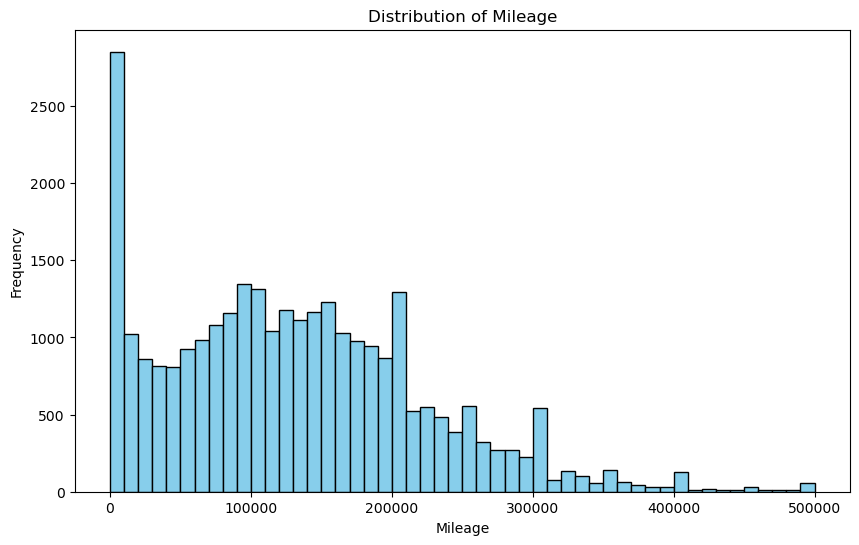

In [41]:
# Create the histogram 
plt.figure(figsize=(10, 6))
#make the x-axis numbers in terms of 1e3 instead of 1e6
plt.hist(Concatenated_Data['Kilometers'], bins=50, color='skyblue', edgecolor='black' , range=[0, 500000])
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [42]:
companies_count = Concatenated_Data['Make'].value_counts().nlargest(15)
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3','#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#1F77B4', '#FF7F0E','#2CA02C', '#D62728', '#9467BD']
fig = go.Figure(data=[go.Pie(labels=companies_count.index,values=companies_count.values,pull=[0.1] + [0] * (len(companies_count) - 1), marker=dict(colors=colors),  hoverinfo='label+percent+value',       textinfo='label+percent',   textfont=dict(size=14))  ])
fig.update_layout( title_text="Top 15 Car Makers",    title_x=0.5,  title_font=dict(size=24, color='black', family='Arial'),  showlegend=True,   legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.6, font=dict(size=12)),   margin=dict(t=100, b=120, l=40, r=40),    height=800,    width=800  )
fig.show()

In [43]:
years_count = Concatenated_Data['Year'].value_counts().nlargest(15)
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3','#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#1F77B4', '#FF7F0E','#2CA02C', '#D62728', '#9467BD']
fig = go.Figure(data=[go.Pie(labels=years_count.index,values=years_count.values,pull=[0.1] + [0] * (len(years_count) - 1), marker=dict(colors=colors),  hoverinfo='label+percent+value',       textinfo='label+percent',   textfont=dict(size=14))  ])
fig.update_layout( title_text="Top 15 Car Years",    title_x=0.5,  title_font=dict(size=24, color='black', family='Arial'),  showlegend=True,   legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.6, font=dict(size=12)),   margin=dict(t=100, b=120, l=40, r=40),    height=800,    width=800  )
fig.show()

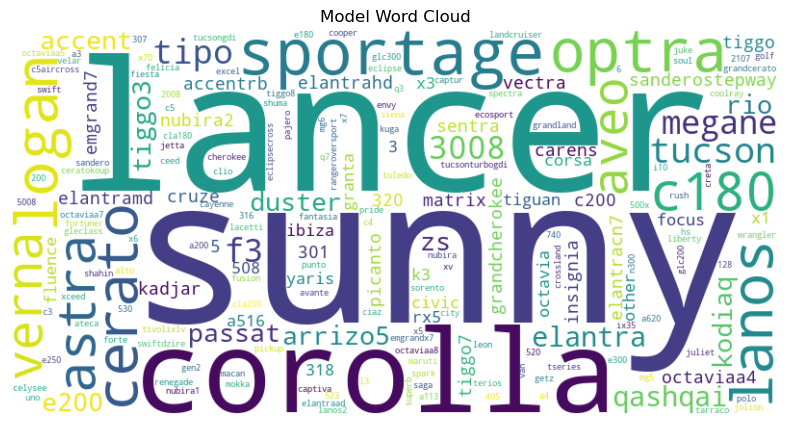

In [44]:
#%pip install wordcloud
from wordcloud import WordCloud

model_counts = Concatenated_Data['Model'].value_counts()
model_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(model_counts)
plt.figure(figsize=(10, 5))
plt.imshow(model_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Model Word Cloud')
plt.show()

## Outliars detection and Removal

In [45]:
#get copy from the DF
cars_df = Concatenated_Data.copy()
#cars_df.info()
cars_df['Kilometers'] = cars_df['Kilometers'].apply(lambda x: round(x, -4))
#create cars_dict with nested four keys  : Make , Model , Year , KiloMeters and value is array of Price
cars_dict = cars_df.groupby(['Make', 'Model', 'Year', 'Kilometers'])['Price'].apply(list).to_dict()
#print(cars_dict)

In [46]:
#define Q1, Q3 , IQR for each array
def get_iqr(prices):
    #prices is a list not sorted
    prices_sorted = sorted(prices)
    #print (prices_sorted)
    #q1 is average of the first half of the prices
    prices_first_half = prices_sorted[:len(prices_sorted)//2]
    #print (prices_first_half)
    q1 = np.median(prices_first_half)
    #print (q1)
    #q3 is average of the second half of the prices
    prices_second_half = prices_sorted[len(prices_sorted)//2:]
    #print(prices_second_half)
    q3 = np.median(prices_second_half)
    #print (q3)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    #lower_bound = 0 
    #upper_bound = 0
    return lower_bound, upper_bound

In [47]:
#Outliar detection
for key, value in cars_dict.items():
    #print (key)
    #print (value)
    if len(value) > 1:
        lower_bound, upper_bound = get_iqr(value)
        #print value if there's any outlier
        if any(price < lower_bound or price > upper_bound for price in value):
            print(key, value , lower_bound, upper_bound)
            #print the outliers
            print([price for price in value if price < lower_bound or price > upper_bound])   


('audi', 'q3', 2024, 0.0) [2950000, 2775000, 2790000, 3550000, 2950000, 2850000, 2750000, 1850000, 2750000] 2450000.0 3250000.0
[3550000, 1850000]
('bmw', '320', 2016, 140000.0) [1585000, 1585000, 141000, 1650000, 1585000, 1520000, 1585000, 1450000] 1335000.0 1735000.0
[141000]
('bmw', '520', 2024, 0.0) [910000, 4400000, 4750000, 5150000, 4850000, 5000000, 5450000, 5800000] 3487500.0 6387500.0
[910000]
('bmw', '530', 2023, 10000.0) [4450000, 4350000, 4300000, 4300000, 4350000, 4650000, 4300000] 4150000.0 4550000.0
[4650000]
('bmw', 'x1', 2024, 0.0) [2300000, 2374000, 2850000, 3250000, 2950000, 3000000, 2990000, 3450000, 3100000, 3150000, 3350000, 3000000, 3350000] 2375000.0 3775000.0
[2300000, 2374000]
('bmw', 'x1', 2025, 0.0) [3450000, 3350000, 3300000, 3500000, 3100000, 3450000, 3400000, 3430000, 3480000] 3137500.0 3637500.0
[3100000]
('bmw', 'x6', 2024, 0.0) [6550000, 8850000, 8500000, 8900000, 8750000, 9000000] 7900000.0 9500000.0
[6550000]
('byd', 'f3', 2025, 0.0) [645000, 625000,

In [48]:
#create empty df cars_df_nooutliers with columns Make , Model , Year , KiloMeters , Price
df_columns = ['Make', 'Model', 'Year', 'Kilometers', 'Price']
cars_df_nooutliers = pd.DataFrame(columns = df_columns)
for key, value in cars_dict.items():
    #print (key)
    #print (value)
    if len(value) > 1:
        lower_bound, upper_bound = get_iqr(value)
        #print value if there's any outlier
        for price in value:
            if price >= lower_bound and price <= upper_bound:
                make, model, year, kilometers = key
                cars_df_nooutliers = pd.concat([cars_df_nooutliers, pd.DataFrame({'Make': [make], 'Model': [model], 'Year': [year], 'Kilometers': [kilometers], 'Price': [price]})], ignore_index=True)
    else:
        make, model, year, kilometers = key
        cars_df_nooutliers = pd.concat([cars_df_nooutliers, pd.DataFrame({'Make': [make], 'Model': [model], 'Year': [year], 'Kilometers': [kilometers], 'Price': value})], ignore_index=True)
#change Year , Price to int
cars_df_nooutliers['Year'] = cars_df_nooutliers['Year'].astype(int)
cars_df_nooutliers['Price'] = cars_df_nooutliers['Price'].astype(int)
cars_df_nooutliers.info()
cars_df_nooutliers.head(2)


C:\Users\m3ni62\AppData\Local\Temp\ipykernel_24544\2391049984.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28940 entries, 0 to 28939
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Make        28940 non-null  object 
 1   Model       28940 non-null  object 
 2   Year        28940 non-null  int32  
 3   Kilometers  28940 non-null  float64
 4   Price       28940 non-null  int32  
dtypes: float64(1), int32(2), object(2)
memory usage: 904.5+ KB


,Make,Model,Year,Kilometers,Price
0,abarth,595,1974,100000.0,220000
1,alfa,146,1996,90000.0,160000


In [49]:
cars_df_nooutliers.describe()

,Year,Kilometers,Price
count,28940.000000,28940.000000,2.894000e+04
mean,2014.900968,131032.135453,1.105844e+06
std,8.116639,95228.662830,1.351052e+06
min,1900.000000,0.000000,2.400000e+04
25%,2010.000000,60000.000000,4.400000e+05
50%,2017.000000,120000.000000,7.250000e+05
75%,2021.000000,190000.000000,1.265000e+06
max,2025.000000,1000000.000000,2.600000e+07


In [50]:
remove_outliars = False
if remove_outliars:
    Concatenated_Data = cars_df_nooutliers

In [51]:
Concatenated_Data.describe()

,Year,Price,Kilometers
count,29197.0,2.919700e+04,29197.000000
mean,2014.950406,1.108356e+06,130432.955269
std,8.109257,1.350889e+06,95099.840692
min,1900.0,2.400000e+04,0.000000
25%,2011.0,4.400000e+05,60000.000000
50%,2017.0,7.250000e+05,120000.000000
75%,2021.0,1.275000e+06,190000.000000
max,2025.0,2.600000e+07,1000000.000000


In [52]:
Concatenated_Data.head()

,Make,Model,Year,Price,Kilometers
0,mercedes,c180,2019,2775000,50000.0
1,bmw,520,2015,1300000,235000.0
2,kia,pride,1997,170000,212000.0
3,nissan,sunny,2015,520000,73000.0
4,toyota,prado,2021,4500000,36000.0


In [53]:
Concatenated_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29197 entries, 0 to 29196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Make        29197 non-null  object 
 1   Model       29197 non-null  object 
 2   Year        29197 non-null  Int64  
 3   Price       29197 non-null  int64  
 4   Kilometers  29197 non-null  float64
dtypes: Int64(1), float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [54]:
#Trial for Rounding Kilometers to nearst ten of thousands (10000)
Rounding = False
if Rounding:
    print ("unique values : " ,  len(Concatenated_Data['Kilometers'].unique()))
    Concatenated_Data['Kilometers'] = round(Concatenated_Data['Kilometers'] , -4)
    print ("unique values : " ,  len(Concatenated_Data['Kilometers'].unique()))

In [55]:
Concatenated_Data.describe()

,Year,Price,Kilometers
count,29197.0,2.919700e+04,29197.000000
mean,2014.950406,1.108356e+06,130432.955269
std,8.109257,1.350889e+06,95099.840692
min,1900.0,2.400000e+04,0.000000
25%,2011.0,4.400000e+05,60000.000000
50%,2017.0,7.250000e+05,120000.000000
75%,2021.0,1.275000e+06,190000.000000
max,2025.0,2.600000e+07,1000000.000000


# Regression Models

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

## Separate features (X) and target variable (y)

In [57]:
X=Concatenated_Data.drop(columns=["Price"])
y=Concatenated_Data["Price"]

## Identify categorical and numerical features

In [58]:
X.info()
categorical_features = X.select_dtypes(include=['object']).columns
print (categorical_features)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
print (numerical_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29197 entries, 0 to 29196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Make        29197 non-null  object 
 1   Model       29197 non-null  object 
 2   Year        29197 non-null  Int64  
 3   Kilometers  29197 non-null  float64
dtypes: Int64(1), float64(1), object(2)
memory usage: 941.0+ KB
Index(['Make', 'Model'], dtype='object')
Index(['Year', 'Kilometers'], dtype='object')


##  Encoding (Label or Hot)

In [59]:
encoding= "Label"   #change to "OneHotEncoder" if you want to use OneHotEncoder
#encoding= "OneHotEncoder"
#report the number of unique values
print ("unique values : " ,  len(Concatenated_Data['Make'].unique()) + len(Concatenated_Data['Model'].unique()))
X_categorical = {}
if encoding== "Label":
    encoder = LabelEncoder()
    X_categorical['Make'] = encoder.fit_transform(X['Make'])
    X_categorical['Model'] = encoder.fit_transform(X['Model'])
    X_categorical = pd.DataFrame(X_categorical)
elif encoding== "OneHotEncoder":
    encoder= OneHotEncoder(handle_unknown="ignore",sparse_output=False)
    X_categorical = encoder.fit_transform(X[['Make', 'Model']])
    X_categorical = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(['Make', 'Model']))
    print(X_categorical.shape)

unique values :  1027


## Scale numerical features

In [60]:
X_numerical = {}
scaler=StandardScaler()
X_numerical['Year'] = scaler.fit_transform(X[['Year']])
X_numerical['Kilometers'] = scaler.fit_transform(X[['Kilometers']])

## Convert encoded/Scaled  data back to DataFrame

In [61]:
if encoding== "Label":
    X_categorical_df = pd.DataFrame(X_categorical, columns=categorical_features)
    X_numerical_df = pd.DataFrame({key: value.flatten() for key, value in X_numerical.items()})
    X_processed = pd.concat([X_numerical_df, X_categorical_df], axis=1)
    X_processed.info()
elif encoding== "OneHotEncoder":
    X_categorical_df = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_features))
    X_categorical_df.info()
    X_numerical_df = pd.DataFrame({key: value.flatten() for key, value in X_numerical.items()})
    X_processed = pd.concat([X_numerical_df, X_categorical_df], axis=1)
    X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29197 entries, 0 to 29196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        29197 non-null  float64
 1   Kilometers  29197 non-null  float64
 2   Make        29197 non-null  int32  
 3   Model       29197 non-null  int32  
dtypes: float64(2), int32(2)
memory usage: 684.4 KB


## Split data into training and testing sets

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Random Forest Regression

In [64]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [65]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
y_pred_rf = rf_model.predict(X_test)

In [67]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.8947
Mean Absolute Error (MAE): 141289.33
Root Mean Squared Error (RMSE): 407473.18


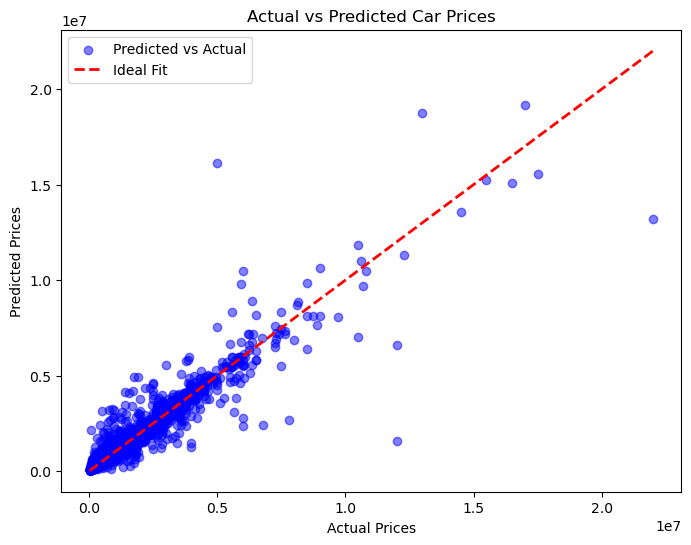

In [68]:
# Scatter Plot for Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()

## Liner Regression

In [69]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [70]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.2266
Mean Absolute Error (MAE): 637971.91
Root Mean Squared Error (RMSE): 1104084.86


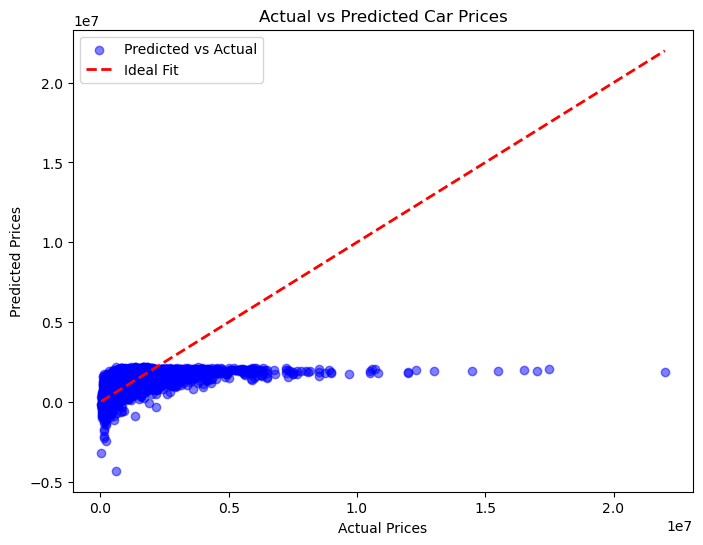

In [71]:
# Scatter Plot for Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()

## Ridge Regression

In [72]:
#create Ridge linear regression
from sklearn.linear_model import LinearRegression, Ridge
#alpha range from 0 to 1 with step 0.1
#for alpha in [0.1,0.5,1]:
#    for solver in ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']:
#        rlr_model =  Ridge(alpha=alpha, solver=solver)
#        rlr_model.fit(X_train, y_train)
#        y_pred_rlr = rlr_model.predict(X_test)
#        r2 = r2_score(y_test, y_pred_rlr)
#        mae = mean_absolute_error(y_test, y_pred_rlr)
#        rmse = np.sqrt(mean_squared_error(y_test, y_pred_rlr))
#        print(f"R² Score: {r2:.4f} for alpha : {alpha} and solver : {solver}")
rlr_model =  Ridge()
rlr_model.fit(X_train, y_train)
y_pred_rlr = rlr_model.predict(X_test)
r2 = r2_score(y_test, y_pred_rlr)
mae = mean_absolute_error(y_test, y_pred_rlr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rlr))
print(f"R² Score: {r2:.4f}")
print (f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 0.2266
Mean Absolute Error (MAE): 637968.02
Root Mean Squared Error (RMSE): 1104084.36


## Lasso Regression

In [73]:
#create Lasso linear regression
from sklearn.linear_model import LinearRegression, Lasso
#for alpha in [0.1,0.5,1]:
#    #alpha = alpha / 10
#    for selection in ['cyclic', 'random']:
#        llr_model =  Lasso(alpha=alpha)
#        llr_model.fit(X_train, y_train)
#        y_pred_llr = llr_model.predict(X_test)
#        r2 = r2_score(y_test, y_pred_llr)
#        mae = mean_absolute_error(y_test, y_pred_llr)
#        rmse = np.sqrt(mean_squared_error(y_test, y_pred_llr))
#        print(f"R² Score: {r2:.4f} for alpha : {alpha} and selection : {selection}")
llr_model =  Lasso()
llr_model.fit(X_train, y_train)
y_pred_llr = llr_model.predict(X_test)
r2 = r2_score(y_test, y_pred_llr)
mae = mean_absolute_error(y_test, y_pred_llr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_llr))
print(f"R² Score: {r2:.4f}")
print (f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 0.2266
Mean Absolute Error (MAE): 637971.75
Root Mean Squared Error (RMSE): 1104084.84


## Models Grid